## Preamble

In [47]:
#pip install sympy
#pip install numpy
#pip install pandas
#pip install matplotlib

In [3]:
pip install datetime

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
pip install csv

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement csv (from versions: none)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for csv


In [10]:
import numpy as np
from sympy import symbols, Eq, solve
from sympy.interactive import printing
from sympy import pi
import pandas as pd
import matplotlib.pyplot as plt
import datetime

## 02.12 -03.12 Offline Kalibrierung

### Import data

In [49]:
# File import
with open('calibrationdata.txt', 'r') as file:
    lines = file.readlines()[0:]

data = []
for line in lines:
    # Split
    parts = line.split()
    
    # Bye first column
    row = parts[2:]
    data.append(row)

# Column names
columns = [
     "Frequency", "Re(1ω)", "Im(1ω)", "Re(3ω)", "Im(3ω)", "Phase(1ω)", "Phase(3ω)",
    "Vref", "Current", "Re(ΔT)", "Δ[Re(ΔT)]", "Im(ΔT)", "Δ[Im(ΔT)]", "Power", "Temperature"
]

# DataFrame
df = pd.DataFrame(data, columns=columns)
print(df)

  Frequency             Re(1ω)              Im(1ω)             Re(3ω)  \
0    10.000  0.128168420396861  -0.000000000000004  0.001201514320429   
1    14.592  0.128929742917524   0.000000000000003  0.001113346330013   
2    21.294  0.129612913502709   0.000000000000004  0.001029477080947   
3    31.072  0.130401750345415   0.000000000000010  0.000950022228322   
4    45.342  0.130923792752236   0.000000000000005  0.000871625278675   
5    66.164  0.131501573258185  -0.000000000000018  0.000796766542770   
6    96.549  0.131855597866627   0.000000000000010  0.000723240231149   
7   140.887  0.132121031585632  -0.000000000000012  0.000650013159849   
8   205.587  0.132404500544174   0.000000000000039  0.000577341312168   
9   300.000  0.132491124737582   0.000000000000149  0.000507469009460   

               Im(3ω)           Phase(1ω)            Phase(3ω)      Vref  \
0  -0.000279804426717  -0.000000000001870  -13.109195621472953  0.099384   
1  -0.000277384384230   0.000000000001249  -

In [50]:
df

,Frequency,Re(1ω),Im(1ω),Re(3ω),Im(3ω),Phase(1ω),Phase(3ω),Vref,Current,Re(ΔT),Δ[Re(ΔT)],Im(ΔT),Δ[Im(ΔT)],Power,Temperature
0,10.000,0.128168420396861,-0.000000000000004,0.001201514320429,-0.000279804426717,-0.000000000001870,-13.109195621472953,0.099384,0.009938,1.889020,0.000000,-0.439908,0.002101,0.001274,-145.23
1,14.592,0.128929742917524,0.000000000000003,0.001113346330013,-0.000277384384230,0.000000000001249,-13.990114035348618,0.099090,0.009909,1.755598,0.000000,-0.437398,0.002089,0.001278,-144.34
2,21.294,0.129612913502709,0.000000000000004,0.001029477080947,-0.000275458954937,0.000000000001636,-14.979819379861420,0.098844,0.009884,1.627391,0.000000,-0.435444,0.002080,0.001281,-143.54
3,31.072,0.130401750345415,0.000000000000010,0.000950022228322,-0.000273876427473,0.000000000004540,-16.081437325952354,0.098694,0.009869,1.504062,0.000000,-0.433597,0.002071,0.001287,-142.76
4,45.342,0.130923792752236,0.000000000000005,0.000871625278675,-0.000271773873834,0.000000000002236,-17.317545171358915,0.098499,0.009850,1.382681,0.000000,-0.431122,0.002059,0.001290,-142.14
5,66.164,0.131501573258185,-0.000000000000018,0.000796766542770,-0.000270357226748,-0.000000000007992,-18.742999108909647,0.098368,0.009837,1.265610,0.000000,-0.429444,0.002051,0.001294,-141.55
6,96.549,0.131855597866627,0.000000000000010,0.000723240231149,-0.000267692321052,0.000000000004210,-20.310984168378134,0.098208,0.009821,1.150694,0.000000,-0.425905,0.002035,0.001295,-141.09
7,140.887,0.132121031585632,-0.000000000000012,0.000650013159849,-0.000264381749779,-0.000000000005122,-22.133193942631220,0.098012,0.009801,1.036261,0.000000,-0.421481,0.002014,0.001295,-140.67
8,205.587,0.132404500544174,0.000000000000039,0.000577341312168,-0.000260149654714,0.000000000017062,-24.256299136321825,0.097772,0.009777,0.922663,0.000000,-0.415751,0.001987,0.001295,-140.19
9,300.000,0.132491124737582,0.000000000000149,0.000507469009460,-0.000254816879729,0.000000000064306,-26.662732169375502,0.097530,0.009753,0.813010,0.000000,-0.408239,0.001951,0.001292,-139.86


### Korrelationsgleichung fuer die Kalibrierung

In [51]:
# LaTeX rendering
printing.init_printing()

In [52]:
# Define variables
dRdT = symbols('dR/dT')
dVdf= symbols('dV3w/dlnf')
dR,dT,L,lambda_sub,lambda_air,f,P,I = symbols('dR dT L lambda_sub lambda_air f P I')


In [53]:
equation_dRdT = Eq( ((-4*pi*L)/(P*I))*(lambda_sub)*(dVdf)- dRdT,0)

In [54]:
display(equation_dRdT)

### dR/dT Berechnung (unter Cryo)

#### Parameters fuer die Berechnung

In [59]:
# Geometrie und Bedingungen
T_ref=25                  # Room temperature, 25 03.12.24
lambda_substrate_ref= 1.2 # Temperature 20C

# Slope dRe(V3w)/dlnf Berechnung
v3w=df['Re(3ω)'].values
f=df['Frequency'].values
v3w=v3w.astype(float)
f=f.astype(float)

## dRdT Berechnung

L_mess=1000e-6
P_mess= df['Power'].values
P_mess=P_mess.astype(float)

I_mess= df['Current'].values
I_mess=I_mess.astype(float)

#### Substrate thermal conductivity

In [60]:
lambdaSubstrate=lambda T: 1.2 + 0.0013*(T-20)

#### Slope dRe(V3w)/dln(f)

In [61]:
v3w

array([0.00120151, 0.00111335, 0.00102948, 0.00095002, 0.00087163,
       0.00079677, 0.00072324, 0.00065001, 0.00057734, 0.00050747])

In [62]:
lnf=np.log(f)

In [63]:
print(v3w)
print(f)
print(lnf)

[0.00120151 0.00111335 0.00102948 0.00095002 0.00087163 0.00079677
 0.00072324 0.00065001 0.00057734 0.00050747]
[ 10.     14.592  21.294  31.072  45.342  66.164  96.549 140.887 205.587
 300.   ]
[2.30258509 2.68047343 3.05842534 3.43630709 3.81423376 4.19213651
 4.57005065 4.94795815 5.3258693  5.70378247]


Slope: -0.00020288505883722638, Intercept: 0.0016542674015800065


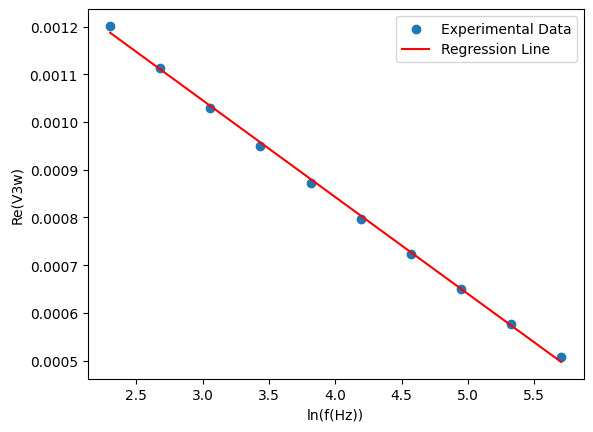

In [64]:
X=lnf
Y=v3w
# Perform linear regression using NumPy's polyfit
coefficients = np.polyfit(X, Y, 1)
slope, intercept = coefficients

# Print the slope and intercept
print(f"Slope: {slope}, Intercept: {intercept}")

# Linear regression
Y_pred = slope * X + intercept

# Plot the data and regression line
plt.scatter(X, Y, label='Experimental Data')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel('ln(f(Hz))')
plt.ylabel('Re(V3w)')
plt.legend()
plt.show()

In [65]:
# Sölope 'dV3w/dlnf' calculated for dR/dT calculation

dVdf_mess=slope
print(dVdf_mess)

-0.00020288505883722638


#### dR/dT Berechnung

In [66]:
P_mean= np.mean(P_mess)
I_mean= np.mean(I_mess)
lambdaSubstrate_mess=lambdaSubstrate(T_ref)
print(P_mean)
print(I_mean)
print(lambdaSubstrate_mess)

0.0012881
0.0098439
1.2065


In [67]:
substituted_eq = equation_dRdT.subs({P: P_mean, I:I_mean, lambda_sub:lambdaSubstrate_mess,dVdf:dVdf_mess, L:L_mess})

In [68]:
substituted_eq

In [69]:
sol = solve(substituted_eq, dRdT)

In [70]:
dRdT_mess=float(sol[0])
print(dRdT_mess)

0.24258865245042804


## 03.12 Messungtest

### Import data

In [1]:
# File import
with open('testdata.txt', 'r') as file:
    lines = file.readlines()[0:]

data_sample = []
for line in lines:
    # Split
    parts = line.split()
    
    # Bye first column
    row = parts[2:]
    data_sample.append(row)

# Column names
columns = [
     "Frequency", "Re(1ω)", "Im(1ω)", "Re(3ω)", "Im(3ω)", "Phase(1ω)", "Phase(3ω)",
    "Vref", "Current", "Re(ΔT)", "Δ[Re(ΔT)]", "Im(ΔT)", "Δ[Im(ΔT)]", "Power", "Temperature"
]

# DataFrame
df_sample = pd.DataFrame(data_sample, columns=columns)
print(df_sample)

FileNotFoundError: [Errno 2] No such file or directory: 'testdata.txt'

In [ ]:
dRdT_mess=float(sol[0])

In [ ]:
print(dRdT_mess)

### Korrelationsgleichung fuer die Messung

In [ ]:
# Define variables
dRdT = symbols('dR/dT')
dVdf= symbols('dV3w/dlnf')
dR,dT,L,lambda_sample,lambda_sub,f,P,I = symbols('dR dT L lambda_sample, lambda_sub f P I')

In [75]:
equation_lambdaSample= Eq( (-P*I*dRdT/(4*pi*L))*(dVdf)**(-1)-lambda_sub-lambda_sample,0)

In [76]:
display(equation_lambdaSample)

### Thermal conductivity Berechnung

#### Parameters fuer die Berechnung

In [77]:
# Geometrie und Bedingungen
T_ref=24                  # Room temperature
lambda_substrate_ref= 1.2 # Temperature 20C
print(dRdT_mess)

# Slope dRe(V3w)/dlnf Berechnung
v3w=df['Re(3ω)'].values
f=df['Frequency'].values
v3w=v3w.astype(float)
f=f.astype(float)

## dRdT Berechnung

L_mess=1000e-6
P_mess= df['Power'].values
P_mess=P_mess.astype(float)

I_mess= df['Current'].values
I_mess=I_mess.astype(float)

0.24258865245042804


#### Slope dRe(V3w)/dln(f)

In [78]:
v3w

array([0.00120151, 0.00111335, 0.00102948, 0.00095002, 0.00087163,
       0.00079677, 0.00072324, 0.00065001, 0.00057734, 0.00050747])

In [79]:
lnf=np.log(f)

In [80]:
print(v3w)
print(f)
print(lnf)

[0.00120151 0.00111335 0.00102948 0.00095002 0.00087163 0.00079677
 0.00072324 0.00065001 0.00057734 0.00050747]
[ 10.     14.592  21.294  31.072  45.342  66.164  96.549 140.887 205.587
 300.   ]
[2.30258509 2.68047343 3.05842534 3.43630709 3.81423376 4.19213651
 4.57005065 4.94795815 5.3258693  5.70378247]


Slope: -0.00020288505883722638, Intercept: 0.0016542674015800065


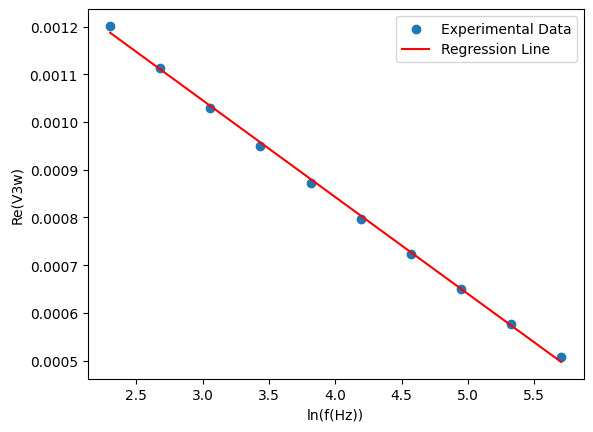

In [81]:
X=lnf
Y=v3w
# Perform linear regression using NumPy's polyfit
coefficients = np.polyfit(X, Y, 1)
slope, intercept = coefficients

# Print the slope and intercept
print(f"Slope: {slope}, Intercept: {intercept}")

# Linear regression
Y_pred = slope * X + intercept

# Plot the data and regression line
plt.scatter(X, Y, label='Experimental Data')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel('ln(f(Hz))')
plt.ylabel('Re(V3w)')
plt.legend()
plt.show()

In [82]:
# Sölope 'dV3w/dlnf' calculated for dR/dT calculation

dVdf_mess=slope
print(dVdf_mess)

-0.00020288505883722638


#### Thermal conductivity der Probe Berechnung

In [83]:
P_mean= np.mean(P_mess)
I_mean= np.mean(I_mess)
lambdaSubstrate_mess=lambdaSubstrate(T_ref)
print(P_mean)
print(I_mean)
print(lambdaSubstrate_mess)
print(dRdT_mess)

0.0012881
0.0098439
1.2052
0.24258865245042804


In [84]:
substituted_eqLambdaSample = equation_lambdaSample.subs({dRdT:dRdT_mess,P: P_mean, I:I_mean, lambda_sub:lambdaSubstrate_mess,dVdf:dVdf_mess, L:L_mess})

In [85]:
substituted_eqLambdaSample

In [86]:
solSample = solve(substituted_eq, dRdT)

In [87]:
lambdaSample_mess=float(solSample[0])
print(lambdaSample_mess)

0.24258865245042804


## 04.12-05.12 Calibration mit Grease und Substrates thermal conductivity messung

## 06.12.24 Conductivity of multilayers

### Series

In [71]:
k_glass=1.2
k_pasivation=1.36
k_al=237
h_glass=0.7e-3
h_pas=200e-9
h_al=80e-9


In [72]:
h_eq=h_al+h_pas
keq=h_eq/((h_al/k_al)+(h_pas/k_pasivation))

In [73]:
h_eq

2.7999999999999997e-07

In [81]:
keq

1.8996396457077427

### Parallel

In [82]:
k_eq2=(h_eq)*(keq/h_eq + (k_glass/h_glass))

In [83]:
k_eq2

1.9001196457077425

## 10.12 T vs R


In [27]:
input_file= "resistance.csv"
data = []
with open(input_file, "r") as file:
    for line in file:
        # Split the line into parts
        parts = line.strip().split('"')
        date = int(parts[0].strip('"'))  # Remove leading/trailing quotes and convert to int
        temperature = float(parts[1].strip('"').replace(',', '.'))  # Remove quotes and convert to float
        resistance = float(parts[2].strip('"').replace(',', '.'))  # Remove quotes and convert to float
        data.append([date, temperature, resistance])

# Create DataFrame
df = pd.DataFrame(data, columns=["date", "temperature", "resistance"])


ValueError: could not convert string to float: ''

In [26]:
df

,date,temperature,resistance
0,1733760599,21.0,577000.0
1,1733760600,21.0,591999.0
2,1733760601,21.0,589001.0
3,1733760602,21.0,582001.0
4,1733760603,21.0,601999.0
...,...,...,...
66909,1733827508,21.0,483000.0
66910,1733827509,21.0,483000.0
66911,1733827510,21.0,487000.0
66912,1733827511,21.0,487000.0


In [7]:
import pandas as pd

# Specify the path to your CSV file
file_path = 'resistance.csv'

# Read the CSV file, specifying the comma as the decimal separator
df = pd.read_csv(file_path, delimiter=',', header=None)

# Replace commas in numbers with dots
df[1] = df[1].str.replace(',', '.').astype(float)
df[2] = df[2].str.replace(',', '.').astype(float)

# Optionally, assign column names
df.columns = ['ID', 'Value1', 'Value2']

# Show the DataFrame
print(df)

KeyError: 1

In [9]:
import pandas as pd

# Specify the path to your CSV file
file_path = 'resistance.csv'

# Read the CSV file with quoted values and no header
df = pd.read_csv(file_path, header=None, quotechar='"')

# Replace commas in numbers with dots and convert them to float
df[1] = df[1].str.replace(',', '.').astype(float)
df[2] = df[2].str.replace(',', '.').astype(float)

# Optionally, assign column names
df.columns = ['ID', 'Value1', 'Value2']

# Show the DataFrame
print(df)

KeyError: 1

In [12]:
import pandas as pd

# Specify the path to your CSV file
file_path = 'resistance.csv'

# Read the CSV file, specifying the separator as a comma, but ensuring that quoted commas are preserved.
df = pd.read_csv(file_path, header=None, quotechar='"')

# Check the DataFrame structure to make sure it was read correctly
print(df.head())

# If necessary, replace commas in numbers with dots and convert them to float
df[1] = df[1].str.replace(',', '.').astype(float)
df[2] = df[2].str.replace(',', '.').astype(float)

# Optionally, assign column names
df.columns = ['ID', 'Value1', 'Value2']

# Show the DataFrame
print(df)

                                    0
0  1733760599,"21,577000","34,498748"
1  1733760600,"21,591999","34,500464"
2  1733760601,"21,589001","34,500464"
3  1733760602,"21,582001","34,496812"
4  1733760603,"21,601999","34,497272"


KeyError: 1

In [13]:
df

,0
0,"1733760599,""21,577000"",""34,498748"""
1,"1733760600,""21,591999"",""34,500464"""
2,"1733760601,""21,589001"",""34,500464"""
3,"1733760602,""21,582001"",""34,496812"""
4,"1733760603,""21,601999"",""34,497272"""
...,...
66909,"1733827508,""21,483000"",""34,487716"""
66910,"1733827509,""21,483000"",""34,489380"""
66911,"1733827510,""21,487000"",""34,489788"""
66912,"1733827511,""21,487000"",""34,489788"""


In [15]:
# Read the CSV file manually
df = pd.read_csv('resistance.csv', header=None, quotechar='"', delimiter=',')

# Print the dataframe's first few rows to inspect the data
print(df.head())


                                    0
0  1733760599,"21,577000","34,498748"
1  1733760600,"21,591999","34,500464"
2  1733760601,"21,589001","34,500464"
3  1733760602,"21,582001","34,496812"
4  1733760603,"21,601999","34,497272"


In [37]:
import pandas as pd

# Initialize an empty list to store the split rows
split_data = []

# Open the file
with open("resistance.csv", "r") as file:
    # Loop through each line in the file
    for line in file:
        # Split the line by a delimiter (e.g., space, comma, etc.)
        row_data = line.strip().split('"')  # You can change the delimiter if needed
        split_data.append(row_data)  # Add the split row to the list

# Create a DataFrame where each row in `split_data` becomes a row in the DataFrame
df = pd.DataFrame(split_data)

In [38]:
df

,0,1,2,3,4,5,6,7,8,9,10
0,,"1733760599,",,"21,577000",,",",,"34,498748",,,
1,,"1733760600,",,"21,591999",,",",,"34,500464",,,
2,,"1733760601,",,"21,589001",,",",,"34,500464",,,
3,,"1733760602,",,"21,582001",,",",,"34,496812",,,
4,,"1733760603,",,"21,601999",,",",,"34,497272",,,
...,...,...,...,...,...,...,...,...,...,...,...
66909,,"1733827508,",,"21,483000",,",",,"34,487716",,,
66910,,"1733827509,",,"21,483000",,",",,"34,489380",,,
66911,,"1733827510,",,"21,487000",,",",,"34,489788",,,
66912,,"1733827511,",,"21,487000",,",",,"34,489788",,,


In [39]:
df[1]

0        1733760599,
1        1733760600,
2        1733760601,
3        1733760602,
4        1733760603,
            ...     
66909    1733827508,
66910    1733827509,
66911    1733827510,
66912    1733827511,
66913    1733827512,
Name: 1, Length: 66914, dtype: object

In [43]:
data = {
    'Column1': df[1],
    'Column2': df[3],
    'Column3': df[7],
    
}
df_clean = pd.DataFrame(data)

In [44]:
df_clean

,Column1,Column2,Column3
0,"1733760599,","21,577000","34,498748"
1,"1733760600,","21,591999","34,500464"
2,"1733760601,","21,589001","34,500464"
3,"1733760602,","21,582001","34,496812"
4,"1733760603,","21,601999","34,497272"
...,...,...,...
66909,"1733827508,","21,483000","34,487716"
66910,"1733827509,","21,483000","34,489380"
66911,"1733827510,","21,487000","34,489788"
66912,"1733827511,","21,487000","34,489788"


In [46]:
# Remove commas in the first column
df_clean['Column1'] = df_clean['Column1'].str.replace(',', '', regex=False)

# Convert the second and third columns to float (replace commas with dots)
df_clean['Column2'] = df_clean['Column2'].str.replace(',', '.').astype(float)
df_clean['Column3'] = df_clean['Column3'].str.replace(',', '.').astype(float)

In [47]:
df_clean

,Column1,Column2,Column3
0,1733760599,21.577000,34.498748
1,1733760600,21.591999,34.500464
2,1733760601,21.589001,34.500464
3,1733760602,21.582001,34.496812
4,1733760603,21.601999,34.497272
...,...,...,...
66909,1733827508,21.483000,34.487716
66910,1733827509,21.483000,34.489380
66911,1733827510,21.487000,34.489788
66912,1733827511,21.487000,34.489788


In [55]:
df_clean["Column1"][10:20]

10    1733760609
11    1733760610
12    1733760611
13    1733760612
14    1733760613
15    1733760614
16    1733760615
17    1733760616
18    1733760617
19    1733760618
Name: Column1, dtype: object

C:\Users\rinc\AppData\Local\Temp\ipykernel_14532\1669497811.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


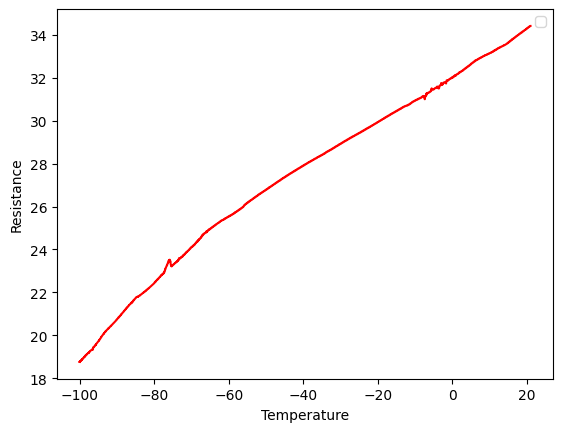

In [69]:
X=df_clean["Column2"][551:4085]
Y=df_clean["Column3"][551:4085]
# Plot the data 
plt.plot(X, Y, color='red')
plt.xlabel('Temperature')
plt.ylabel('Resistance')
plt.legend()
plt.show()

In [60]:
df_clean['Gradient'][1:23450] = (df_clean['Column3'][1:23450].diff() / df_clean['Column2'][1:23450].diff())

C:\Users\rinc\AppData\Local\Temp\ipykernel_14532\853672036.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_clean['Gradient'][1:23450] = (df_clean['Column3'][1:23450].diff() / df_clean['Column2'][1:23450].diff())
C:\Users\rinc\AppData\

In [62]:
df_clean[1:23450]

,Column1,Column2,Column3,Gradient
1,1733760600,21.591999,34.500464,NaN
2,1733760601,21.589001,34.500464,-0.000000
3,1733760602,21.582001,34.496812,0.521714
4,1733760603,21.601999,34.497272,0.023002
5,1733760604,21.601999,34.502028,inf
...,...,...,...,...
23445,1733784044,-99.713997,18.404408,-0.103531
23446,1733784045,-99.674004,18.404408,0.000000
23447,1733784046,-99.647003,18.410290,0.217844
23448,1733784047,-99.647003,18.420208,inf


C:\Users\rinc\AppData\Local\Temp\ipykernel_14532\1774421847.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


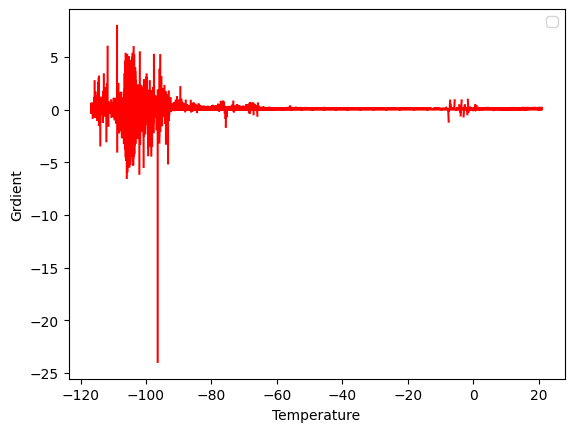

In [67]:
X=df_clean["Column2"][551:4085]
Y=df_clean["Gradient"][551:4085]
# Plot the data 
plt.plot(X, Y, color='red')
plt.xlabel('Temperature')
plt.ylabel('Grdient')
plt.legend()
plt.show()

Polynomial coefficients: [ 0.13161205 32.53413979]


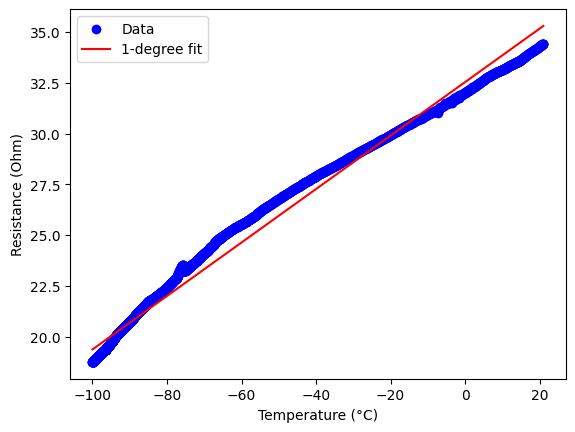

In [83]:

# Perform polynomial fitting (e.g., 1st degree for linear fit)
degree = 1
coefficients = np.polyfit(X, Y, degree)

# Print the polynomial coefficients
print("Polynomial coefficients:", coefficients)

# Generate fitted values
Y_fit = np.polyval(coefficients, X)

# Plot the data and the fit
plt.scatter(X, Y, label='Data', color='blue')
plt.plot(X, Y_fit, label=f'{degree}-degree fit', color='red')
plt.xlabel('Temperature (°C)')
plt.ylabel('Resistance (Ohm)')
plt.legend()
plt.show()

Gradient (derivative) coefficients: [0.13161205]


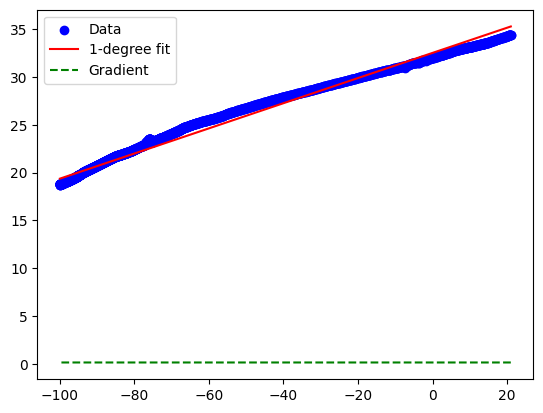

In [84]:
gradient_coefficients = np.polyder(coefficients)

# Generate the gradient values
Y_gradient = np.polyval(gradient_coefficients, X)

# Print the gradient coefficients
print("Gradient (derivative) coefficients:", gradient_coefficients)

# Plot the original data and the gradient
plt.scatter(X, Y, label='Data', color='blue')
plt.plot(X, np.polyval(coefficients, X), label=f'{degree}-degree fit', color='red')
plt.plot(X, Y_gradient, label='Gradient', color='green', linestyle='--')
plt.legend()
plt.show()

In [85]:
Y_gradient


array([0.13161205, 0.13161205, 0.13161205, ..., 0.13161205, 0.13161205,
       0.13161205])

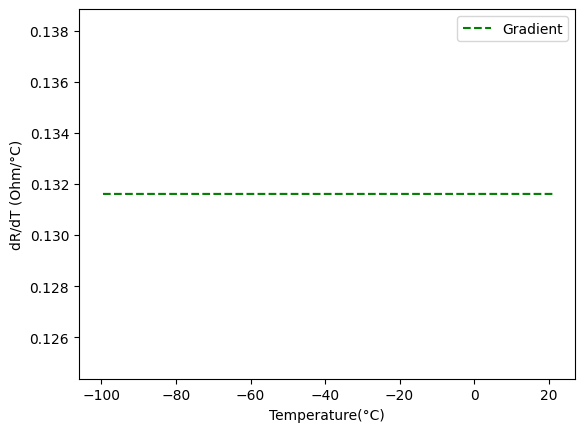

In [86]:
plt.plot(X, Y_gradient, label='Gradient', color='green', linestyle='--')
plt.xlabel('Temperature(°C)')
plt.ylabel('dR/dT (Ohm/°C)')
plt.legend()
plt.show()
